In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob

In [2]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/CNN_assignment.zip -d /content/drive/MyDrive/Colab\ Notebooks/

Archive:  /content/drive/MyDrive/Colab Notebooks/CNN_assignment.zip
  inflating: /content/drive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jp

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [4]:
data_dir_train

PosixPath('/content/drive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [5]:
os.listdir(data_dir_train)

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [6]:
os.listdir(data_dir_test)

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [7]:
os.listdir(os.path.join(data_dir_test, 'actinic keratosis'))

['ISIC_0024511.jpg',
 'ISIC_0024470.jpg',
 'ISIC_0010512.jpg',
 'ISIC_0010889.jpg',
 'ISIC_0024468.jpg',
 'ISIC_0024763.jpg',
 'ISIC_0024654.jpg',
 'ISIC_0024771.jpg',
 'ISIC_0024707.jpg',
 'ISIC_0024646.jpg',
 'ISIC_0025605.jpg',
 'ISIC_0024800.jpg',
 'ISIC_0024948.jpg',
 'ISIC_0024913.jpg',
 'ISIC_0025368.jpg',
 'ISIC_0025427.jpg']

In [8]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [9]:
os.listdir(os.path.join(data_dir_test, 'actinic keratosis'))[0]

'ISIC_0024511.jpg'

In [10]:
from matplotlib.image import imread
first_image_path = os.path.join(data_dir_test, 'actinic keratosis', os.listdir(os.path.join(data_dir_test, 'actinic keratosis'))[0])
first_img = imread(first_image_path)

In [11]:
first_img.shape

(450, 600, 3)

Create a dataset Define some parameters for the loader:

In [12]:
batch_size = 32
img_height = 180
img_width = 180
image_size = (img_height, img_width)

In [13]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='categorical',
    image_size=image_size,
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    seed=123
)

Found 6739 files belonging to 9 classes.


In [14]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    labels='inferred',
    label_mode='categorical',
    image_size=image_size,
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    seed=123
)

Found 118 files belonging to 9 classes.


In [15]:
val_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [16]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


 Breakdown of image distribution across different classes within your training dataset for understanding the dataset composition and potentially identifying class imbalances.

In [45]:
total_images = 0

for class_name in class_names:
  class_path = os.path.join(data_dir_train, class_name)
  num_images = len(os.listdir(class_path))
  total_images += num_images
  print(f'{class_name}: {num_images} images')

print(f'\nTotal images in all classes: {total_images}')

actinic keratosis: 115 images
basal cell carcinoma: 377 images
dermatofibroma: 96 images
melanoma: 439 images
nevus: 358 images
pigmented benign keratosis: 463 images
seborrheic keratosis: 78 images
squamous cell carcinoma: 182 images
vascular lesion: 140 images

Total images in all classes: 2248


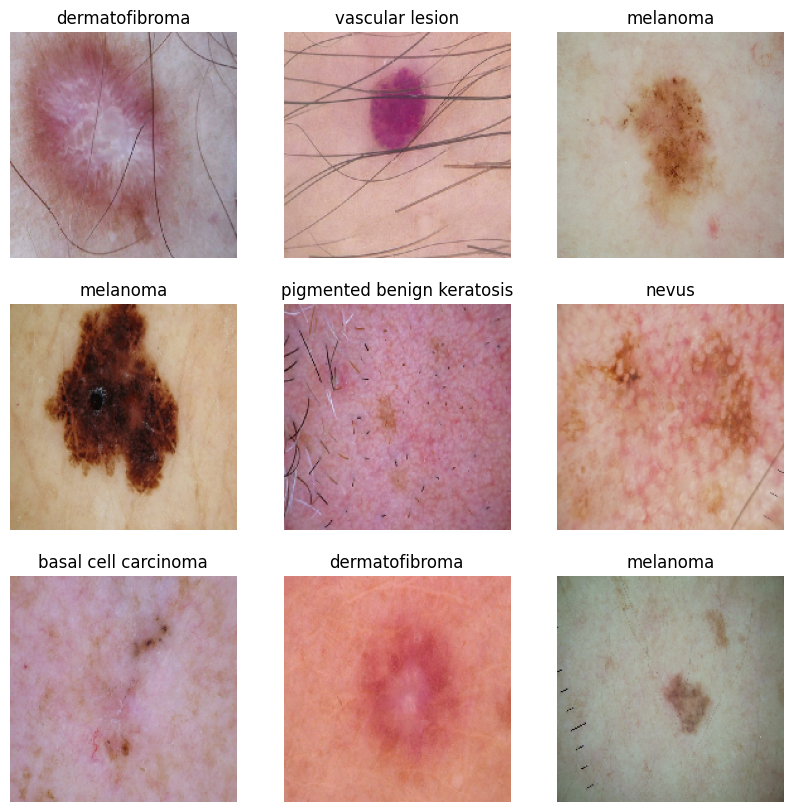

In [17]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [18]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [19]:
from tensorflow.keras.layers import Rescaling

# Define the normalization layer
normalization_layer = Rescaling(1./255)

# Create the CNN model (updated)
model = tf.keras.Sequential([
  Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(9, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Compile the model**

Choose an appropirate optimiser and loss function for model training

In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

**Train the model**

In [22]:
epochs = 25

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 810s 2s/step - accuracy: 0.2371 - loss: 2.0653 - val_accuracy: 0.2627 - val_loss: 2.2977
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.4328 - loss: 1.6050 - val_accuracy: 0.3390 - val_loss: 2.3558
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.4999 - loss: 1.4097 - val_accuracy: 0.3559 - val_loss: 1.8832
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.4936 - loss: 1.4119 - val_accuracy: 0.3390 - val_loss: 2.3769
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.5224 - loss: 1.3531 - val_accuracy: 0.2966 - val_loss: 2.0226
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.5562 - loss: 1.2171 - val_accuracy: 0.3729 - val_loss: 2.3901
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.5993 - loss: 1.1478 - val_accuracy: 0.3475 - val_loss: 2.4397
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.6083 - loss: 1.0563 - val_accuracy: 0.3729 - val_lo

**Visualizing training results**

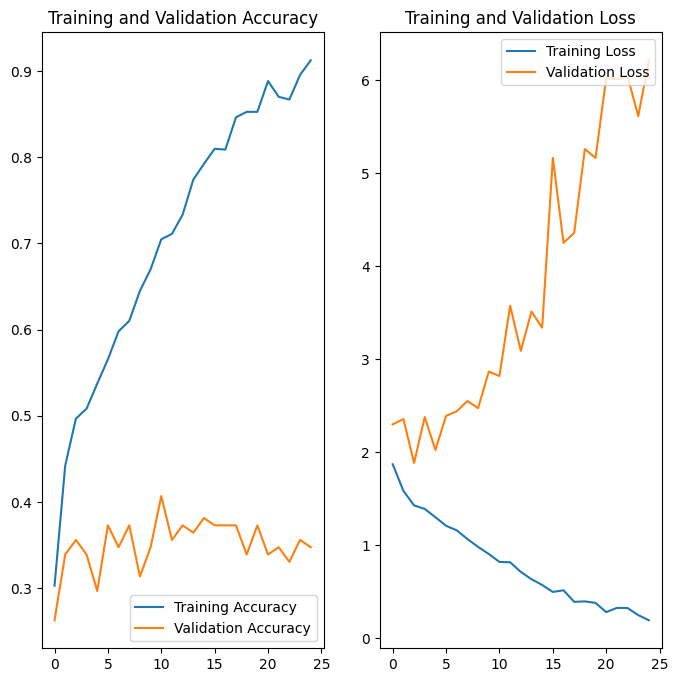

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Findings /Summary**

We can clearly see overfitting here as the training accuracy is good and improves where as validation accuracy does ot improve with number of epochs.

We can clearly see a large gap between Training and Validation metrics.

We are struggling to get good fit for validation data.

We will now perform augmentation to see if it can improve the validation metrics.

**Performing Augmentation**

In [23]:
!pip install Augmentor
import Augmentor

# Create pipelines for each class and pipelines
pipelines = {}
for class_name in class_names:
  pipeline = Augmentor.Pipeline(source_directory=os.path.join(data_dir_train, class_name))
  pipelines[class_name] = pipeline

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.Initialised with 462 image(s) found.
Output directory set

In [24]:
#Adding Augmentation Opearations

for class_name, pipeline in pipelines.items():
  pipeline.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
  pipeline.flip_left_right(probability=0.5)
  pipeline.zoom_random(probability=0.5, percentage_area=0.8)

In [33]:
#generate the augmented images

for class_name, pipeline in pipelines.items():
  num_samples = 500

  #Generate augmented images
  pipeline.sample(num_samples)

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DB640EF8820>: 100%|██████████| 500/500 [00:17<00:00, 28.45 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DB6217980A0>: 100%|██████████| 500/500 [00:18<00:00, 27.59 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DB61B2EAEC0>: 100%|██████████| 500/500 [00:19<00:00, 25.82 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DB628C72980>: 100%|██████████| 500/500 [01:11<00:00,  7.01 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7DB621586E90>: 100%|██████████| 500/500 [01:07<00:00,  7.36 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DB62011FB20>: 100%|██████████| 500/500 [00:22<00:00, 22.59 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DB621547400>: 100%|██████████| 500/500 [00:33<00:00, 14.97 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DB62158512

In [25]:
#Reloding the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='categorical',
    image_size=image_size,
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    seed=123
)

Found 6739 files belonging to 9 classes.


In [26]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Compile the model again for augmented data

Choose an appropirate optimiser and loss function for model training

In [27]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
epochs = 25

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 948s 190ms/step - accuracy: 0.2137 - loss: 2.1011 - val_accuracy: 0.3305 - val_loss: 2.3349
Epoch 2/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.4382 - loss: 1.5127 - val_accuracy: 0.3644 - val_loss: 2.0612
Epoch 3/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.4902 - loss: 1.3354 - val_accuracy: 0.3644 - val_loss: 2.0172
Epoch 4/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.5354 - loss: 1.2333 - val_accuracy: 0.3305 - val_loss: 2.3429
Epoch 5/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.5820 - loss: 1.1098 - val_accuracy: 0.4068 - val_loss: 2.0322
Epoch 6/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.6301 - loss: 0.9900 - val_accuracy: 0.3305 - val_loss: 2.1427
Epoch 7/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.6508 - loss: 0.9233 - val_accuracy: 0.3220 - val_loss: 2.7928
Epoch 8/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.7190 - loss: 0.7755 - v

In [39]:
# Add more augmentation operations
for class_name, pipeline in pipelines.items():
  pipeline.rotate(probability=0.9, max_left_rotation=20, max_right_rotation=20)
  pipeline.flip_left_right(probability=0.7)
  pipeline.zoom_random(probability=0.7, percentage_area=0.7)
  pipeline.shear(probability=0.5, max_shear_left=15, max_shear_right=15)
  pipeline.random_distortion(probability=0.5, grid_width=4, grid_height=4, magnitude=8)
  pipeline.random_color(probability=0.5, min_factor=0.8, max_factor=1.2)
  pipeline.random_contrast(probability=0.5, min_factor=0.8, max_factor=1.2)
  pipeline.random_brightness(probability=0.5, min_factor=0.8, max_factor=1.2)
  pipeline.random_erasing(probability=0.5, rectangle_area=0.2)
  pipeline.flip_top_bottom(probability=0.5)
  pipeline.flip_left_right(probability=0.5)

In [40]:
# Create the CNN model with Dropout and L2 regularization
from tensorflow.keras import regularizers
# Import Input from tensorflow.keras.layers
from tensorflow.keras.layers import Input

model = tf.keras.Sequential([
  Input(shape=(img_height, img_width, 3)),
  Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),  # Dropout layer
  layers.Conv2D(64, 3, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),  # Dropout layer
  layers.Conv2D(128, 3, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(9, activation='softmax')
])

In [41]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
epochs = 50

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.1768 - loss: 2.5021 - val_accuracy: 0.2966 - val_loss: 2.2213
Epoch 2/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.3307 - loss: 1.7883 - val_accuracy: 0.3644 - val_loss: 1.8998
Epoch 3/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.4221 - loss: 1.5711 - val_accuracy: 0.3814 - val_loss: 1.9363
Epoch 4/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.4762 - loss: 1.4504 - val_accuracy: 0.3475 - val_loss: 1.9601
Epoch 5/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.5028 - loss: 1.3691 - val_accuracy: 0.3305 - val_loss: 2.0436
Epoch 6/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.5183 - loss: 1.3439 - val_accuracy: 0.3729 - val_loss: 2.1217
Epoch 7/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.5316 - loss: 1.2781 - val_accuracy: 0.3305 - val_loss: 2.0829
Epoch 8/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.5432 - loss: 1.2485 - val_a

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


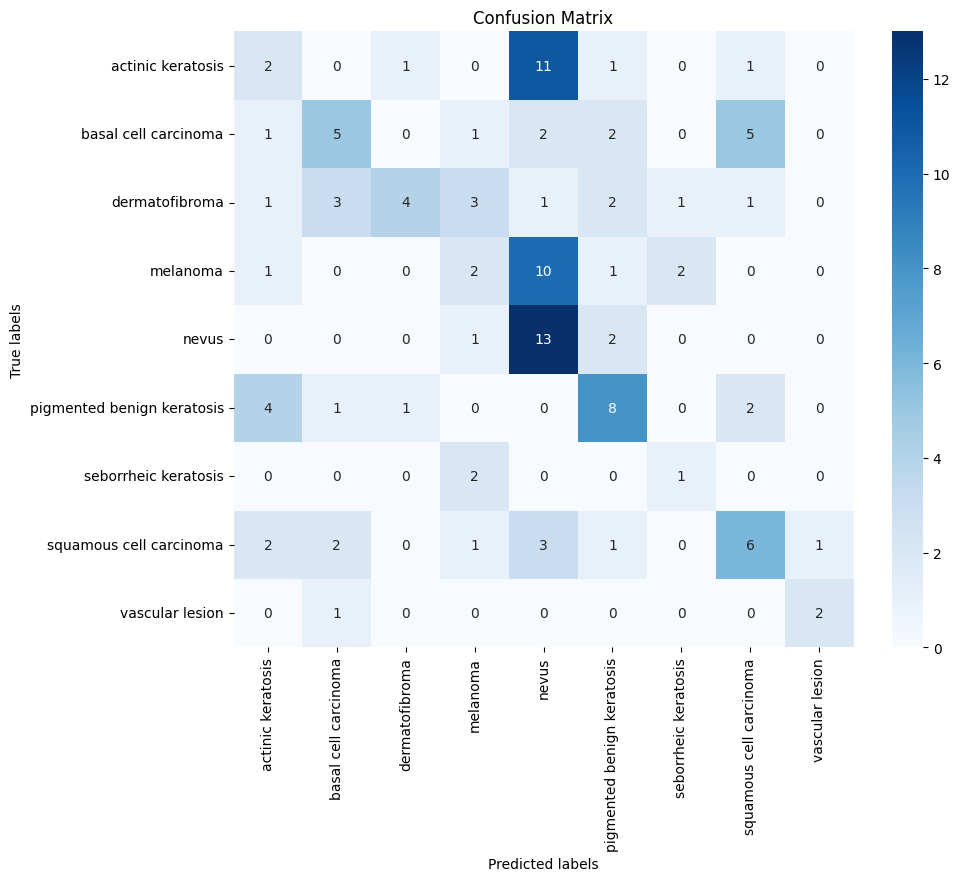

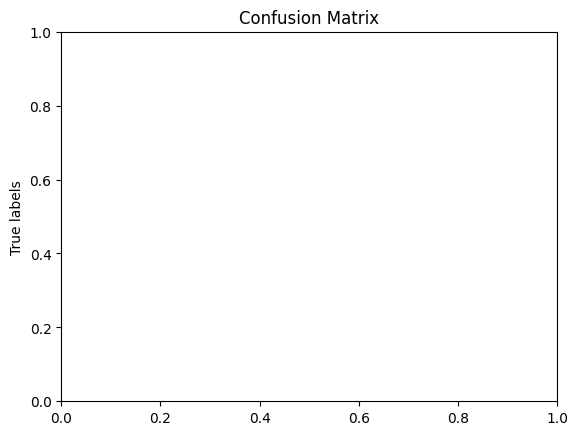

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred = model.predict(val_ds)
y_pred = np.argmax(y_pred, axis=1)

# Get true labels from the validation set
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Make predictions on the validation set
y_pred = model.predict(val_ds)
y_pred = np.argmax(y_pred, axis=1)

# Get true labels from the validation set
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,
            fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()